# Monthly Data
- 호주 당뇨병 치료약(anti-diabetic) 월별 Sales 데이터 사용 예정 
https://raw.githubusercontent.com/selva86/datasets/master/a10.csv
- 모든 회사에 있는 월별 매출, 가입자, 등 실적 데이터에 활용

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

- 데이터 불러오기. plottig. 
- 계절요인 분리. Trend, Seasonl, residual을 포함하는 테이블 생성. 
- Insight 도출
  1. 월평균 성장율 
  2. Seasonal 요소 분석
  3. residual 증감 여부 

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


<AxesSubplot:xlabel='date'>

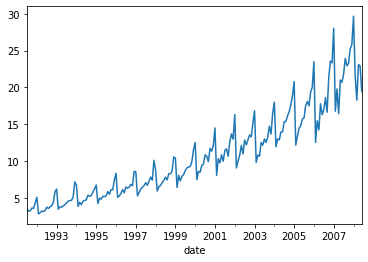

In [5]:
df.value.plot()

In [6]:
df=df[df.index>'1999-12-31']

In [7]:
result= seasonal_decompose(df, model='additive', two_sided=False)
#two_sided: 트렌드 분석에는 최소 12개월이 필요함. 따라서 앞에 12개월을 버릴건지 양쪽 6개월씩을 버릴건지 결정

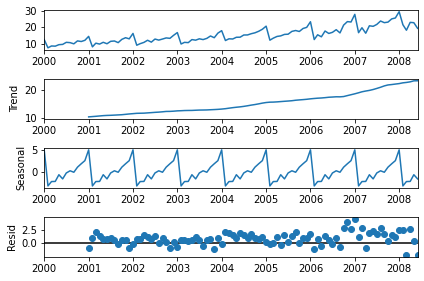

In [8]:
result.plot()
plt.show()

In [25]:
df_re=pd.concat([result.observed, result.trend, result.seasonal, result.resid], axis=1) #위의 데이터를 열로 묶음
df_re.columns=['obs', 'trend', 'seasonal', 'resid']
df_re

,obs,trend,seasonal,resid
date,,,,
2000-01-01,12.511462,NaN,5.061367,NaN
2000-02-01,7.457199,NaN,-3.307973,NaN
2000-03-01,8.591191,NaN,-2.293969,NaN
2000-04-01,8.474000,NaN,-2.264396,NaN
2000-05-01,9.386803,NaN,-0.711368,NaN
...,...,...,...,...
2008-02-01,21.654285,22.482596,-3.307973,2.479662
2008-03-01,18.264945,22.622704,-2.293969,-2.063790
2008-04-01,23.107677,22.837394,-2.264396,2.534679


In [26]:
df_re.dropna(inplace=True) # na값을 없애, 즉 앞의 12행 없앰
df_re

,obs,trend,seasonal,resid
date,,,,
2001-01-01,14.497581,10.290804,5.061367,-0.854590
2001-02-01,8.049275,10.398229,-3.307973,0.959019
2001-03-01,10.312891,10.494636,-2.293969,2.112225
2001-04-01,9.753358,10.619680,-2.264396,1.398075
2001-05-01,10.850382,10.733969,-0.711368,0.827781
...,...,...,...,...
2008-02-01,21.654285,22.482596,-3.307973,2.479662
2008-03-01,18.264945,22.622704,-2.293969,-2.063790
2008-04-01,23.107677,22.837394,-2.264396,2.534679


In [27]:
df_re['year']=df_re.index.year

In [29]:
df_re

,obs,trend,seasonal,resid,year
date,,,,,
2001-01-01,14.497581,10.290804,5.061367,-0.854590,2001
2001-02-01,8.049275,10.398229,-3.307973,0.959019,2001
2001-03-01,10.312891,10.494636,-2.293969,2.112225,2001
2001-04-01,9.753358,10.619680,-2.264396,1.398075,2001
2001-05-01,10.850382,10.733969,-0.711368,0.827781,2001
...,...,...,...,...,...
2008-02-01,21.654285,22.482596,-3.307973,2.479662,2008
2008-03-01,18.264945,22.622704,-2.293969,-2.063790,2008
2008-04-01,23.107677,22.837394,-2.264396,2.534679,2008


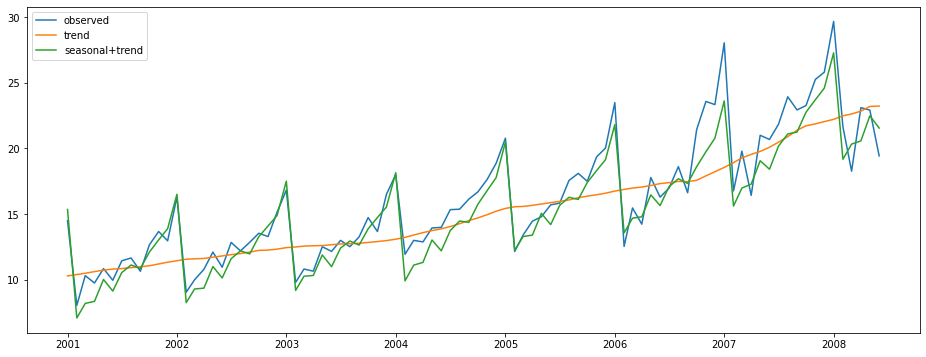

In [37]:
plt.figure(figsize=(16,6))
plt.plot(df_re.obs)
plt.plot(df_re.trend)
plt.plot(df_re.seasonal+df_re.trend)
plt.legend(['observed', 'trend', 'seasonal+trend'])
plt.show()
# 2006년 2007년에는 ordinary한 cycle에서 벗어나는 경향이 있다. (residual 크다. )

In [50]:
df_re.index[0]

# 그래프의 x값을 간단히

def get_date(date):
  return (str(date.year)+'-'+str(date.month))
get_date(df_re.index[0])


'2001-1'

[Text(0, 0, '2001-1'),
 Text(1, 0, '2001-2'),
 Text(2, 0, '2001-3'),
 Text(3, 0, '2001-4'),
 Text(4, 0, '2001-5'),
 Text(5, 0, '2001-6'),
 Text(6, 0, '2001-7'),
 Text(7, 0, '2001-8'),
 Text(8, 0, '2001-9'),
 Text(9, 0, '2001-10'),
 Text(10, 0, '2001-11'),
 Text(11, 0, '2001-12'),
 Text(12, 0, '2002-1'),
 Text(13, 0, '2002-2'),
 Text(14, 0, '2002-3'),
 Text(15, 0, '2002-4'),
 Text(16, 0, '2002-5'),
 Text(17, 0, '2002-6'),
 Text(18, 0, '2002-7'),
 Text(19, 0, '2002-8'),
 Text(20, 0, '2002-9'),
 Text(21, 0, '2002-10'),
 Text(22, 0, '2002-11'),
 Text(23, 0, '2002-12'),
 Text(24, 0, '2003-1'),
 Text(25, 0, '2003-2'),
 Text(26, 0, '2003-3'),
 Text(27, 0, '2003-4'),
 Text(28, 0, '2003-5'),
 Text(29, 0, '2003-6'),
 Text(30, 0, '2003-7'),
 Text(31, 0, '2003-8'),
 Text(32, 0, '2003-9'),
 Text(33, 0, '2003-10'),
 Text(34, 0, '2003-11'),
 Text(35, 0, '2003-12'),
 Text(36, 0, '2004-1'),
 Text(37, 0, '2004-2'),
 Text(38, 0, '2004-3'),
 Text(39, 0, '2004-4'),
 Text(40, 0, '2004-5'),
 Text(41, 0, '200

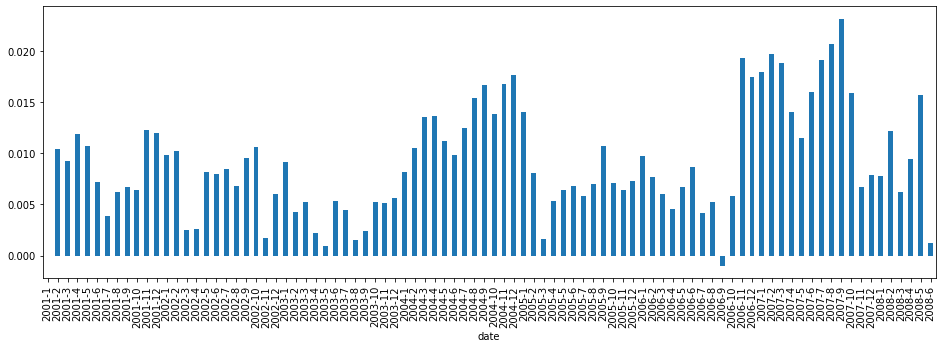

In [57]:
#trend의 변화율, 즉 성장률?
ax = df_re.trend.pct_change().plot(kind='bar', figsize=(16,5))
ax.set_xticklabels(list(map(lambda x: get_date(x), df_re.index)))


<AxesSubplot:xlabel='year'>

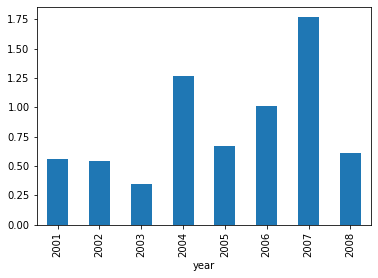

In [58]:
# residual : unexpected 값들이다.
df_re.groupby('year')['resid'].mean().plot(kind='bar')
